In [24]:
from __future__ import division
import random

import pandas as pd
import numpy as np

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix, make_scorer
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
%matplotlib inline

from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from collections import Counter
import os

home_dir = os.getcwd()

# Data preparation

In [ ]:
initial_data = pd.read_csv(home_dir + '/initial_dataset')

init_target_y = initial_data.iloc[:, 0]  # First column in labels
init_data_x = initial_data.drop(initial_data.columns[0], axis=1)  # First column in labels
    
    
sns.countplot('class', data = init_data_x)
plt.title('Training: Anomaly (1) vs. Normal (0)')
plt.show()

In [ ]:
test_set = pd.read_csv(home_dir + '/scania/test_set_new.csv')

In [ ]:
model = RandomForestClassifier(criterion="entropy", n_estimators=50)

In [11]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(clf, hyperF, scoring="f1", cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train_less_feat, y_train)

gridF.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

Average precision-recall score: 0.27
cost_1_instances are 568
cost_2_instances are 18
Correct normal predictions are 14182
Correct anomaly predictions are 232
Total Cost is 14680
Accuracy of Random forest after GridSearch is 96.09333 %


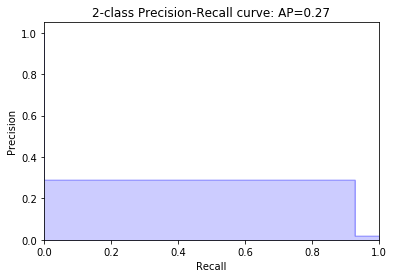

In [17]:
best_grid = gridF.best_estimator_
#predictions = best_grid.predict(x_test_less_feat)
    # predictions = np.round(predictions)

prediction_prob = best_grid.predict_proba(x_test_less_feat)
       
predictions = []
true_labels = []
for pr in prediction_prob:
    if pr[0] > 0.95:
        predictions.append(0)  # Neg
    else:
        predictions.append(1)  # Pos

accuracy = 0
for i in range(0, len(predictions)):
    if predictions[i] == y_test[i]:
        accuracy +=1


conf_mat = confusion_matrix(y_test, predictions)        
average_precision = average_precision_score(y_test, predictions)

#find average precision recall
print('Average precision-recall score: {0:0.2f}'.format(average_precision))
precision, recall, _ = precision_recall_curve(y_test, predictions)

    #plot precision recall

precision, recall, _ = precision_recall_curve(y_test, predictions)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))

# write_predictions_to_file(name + '_output.csv.dat', y_test)
find_cost(predictions, X_train, X_test, y_train, y_test)
# print ("Accuracy of {} is {} %".format(name, round((accuracy)*100, 5)))

print("Accuracy of Random forest after GridSearch is {} %".format(round((accuracy/len(predictions))*100, 5)))
